### Full Name : Alireza Noori
### Student Number : 402210021


# Support Vector Machines (SVM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [6]:
df = pd.read_csv("Liver_Disease.csv")

### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

Shape of the Dateset: (583, 11)

Missing entries in each column:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64

Distribution of target variable:
label
1    416
2    167
Name: count, dtype: int64



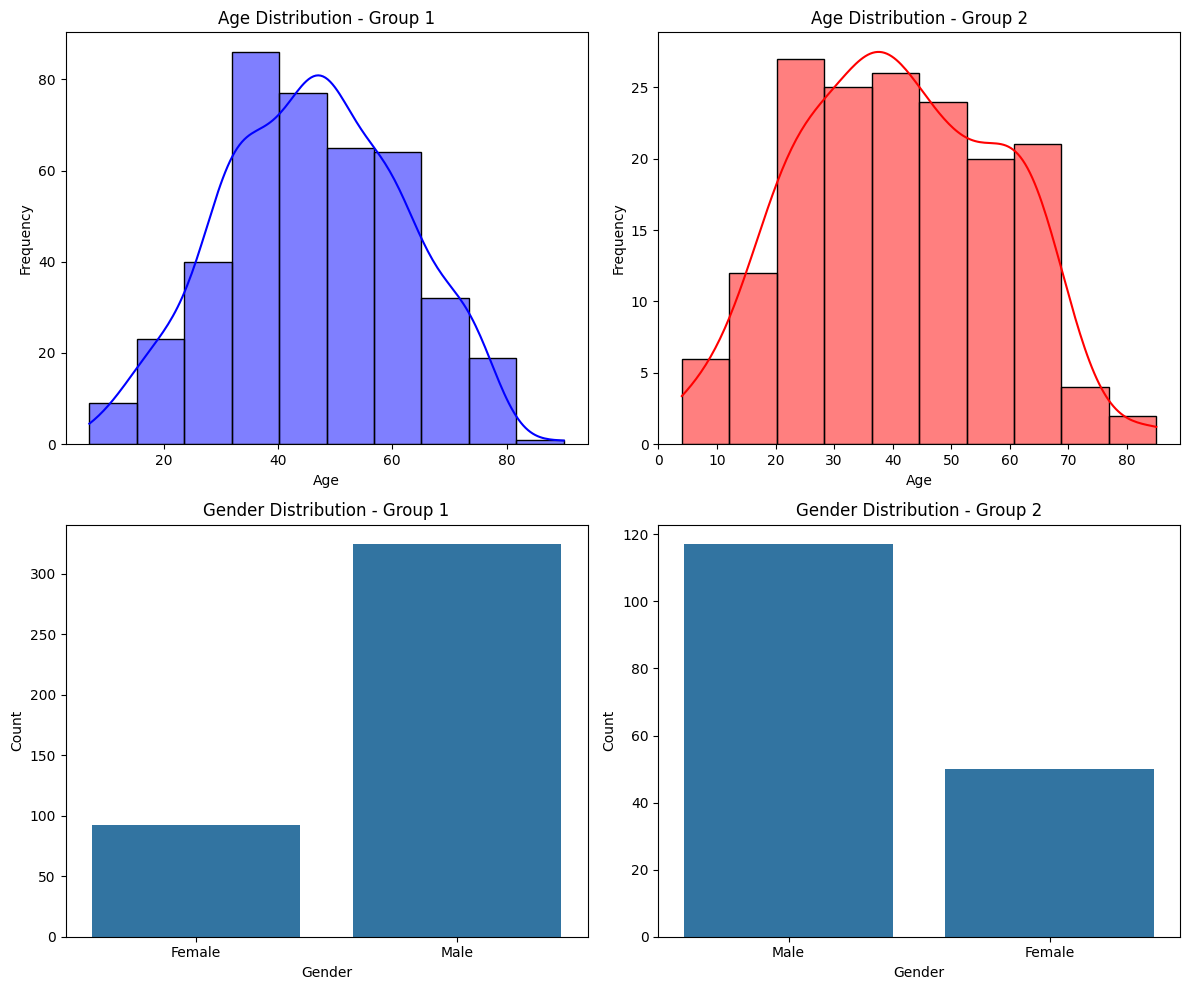

In [3]:
# Find the shape of the dataset.
df_shape = df.shape
print(f'Shape of the Dateset: {df_shape}\n')

# Check if there is missing entries in the dataset.
missing_entries = df.isnull().sum()
print(f'Missing entries in each column:\n{missing_entries}\n', )

# Check whether the dataset is balanced or not.
balance = df['label'].value_counts()
print(f"Distribution of target variable:\n{balance}\n")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Age Distribution for Group 1
sns.histplot(df[df['label'] == 1]['Age'], bins=10, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Age Distribution - Group 1')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Plot Age Distribution for Group 2
sns.histplot(df[df['label'] == 2]['Age'], bins=10, kde=True, ax=axes[0, 1], color='red')
axes[0, 1].set_title('Age Distribution - Group 2')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# Plot Gender Distribution for Group 1
sns.countplot(x='Gender', data=df[df['label'] == 1], ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution - Group 1')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')

# Plot Gender Distribution for Group 2
sns.countplot(x='Gender', data=df[df['label'] == 2], ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution - Group 2')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

##### Question: What do you conclude from the plots?
Males are usually in Gropu 1 and Females in Group 2. And about age, people between 30 to 50 are more in grope 1 in comparisoon to other ages. But Group 2 is more diverse, from 20 to 70 we have lots of people.

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [4]:
# Calculate the IQR for numerical features
numerical_columns = df.select_dtypes(include=[np.number]).columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask for filtering out the outliers
outlier_mask = ~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)

# Remove outliers
df_cleaned = df[outlier_mask]

# Check the shape of the original and cleaned dataset
print(f'Shape of the original dataset: {df.shape}')
print(f'Shape of the dataset after removing outliers: {df_cleaned.shape}')


Shape of the original dataset: (583, 11)
Shape of the dataset after removing outliers: (398, 11)


#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Select only the numerical columns
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the numerical columns and transform the data
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

<ipython-input-5-887b43282ce8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])


### SVM

#### spliting data

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Gender' column
df_cleaned['Gender'] = label_encoder.fit_transform(df_cleaned['Gender'])

# Drop any existing NaN values (if any)
df_cleaned.dropna(inplace=True)

# Split the data again after encoding (if necessary)
X = df_cleaned.drop(columns=['label'])  # Features: all columns except 'label'
y = df_cleaned['label']                   # Target variable: 'label'

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (315, 10)
Shape of X_test: (79, 10)
Shape of y_train: (315,)
Shape of y_test: (79,)


<ipython-input-6-2cf958b8fb40>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = label_encoder.fit_transform(df_cleaned['Gender'])
<ipython-input-6-2cf958b8fb40>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)


### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [7]:
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model with default parameters
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy of SVM Model: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy of SVM Model: 0.66
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.94      0.77        49
         1.0       0.67      0.20      0.31        30

    accuracy                           0.66        79
   macro avg       0.66      0.57      0.54        79
weighted avg       0.66      0.66      0.60        79



#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # SVM kernel types
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize the SVM model
svm_model = SVC()

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Make predictions with the best model on the validation set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Calculate accuracy and classification report
best_accuracy = accuracy_score(y_test, y_pred_best)
best_report = classification_report(y_test, y_pred_best)

# Print results
print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.2f}')
print(f'Accuracy of Best SVM Model on Test Set: {best_accuracy:.2f}')
print('Classification Report of Best SVM Model:')
print(best_report)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.65
Accuracy of Best SVM Model on Test Set: 0.63
Classification Report of Best SVM Model:
              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73        49
         1.0       0.52      0.37      0.43        30

    accuracy                           0.63        79
   macro avg       0.60      0.58      0.58        79
weighted avg       0.62      0.63      0.62        79



Train an svm model on the entire training data using the parameters you found in the previous step.

In [9]:
# Initialize the SVM model with the best parameters found from Grid Search
best_model = SVC(**best_params)

# Fit the model on the entire training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_final = best_model.predict(X_test)

# Calculate accuracy and classification report for the final model
final_accuracy = accuracy_score(y_test, y_pred_final)
final_report = classification_report(y_test, y_pred_final)

# Print results
print(f'Final Accuracy of SVM Model on Test Set: {final_accuracy:.2f}')
print('Final Classification Report of SVM Model:')
print(final_report)


Final Accuracy of SVM Model on Test Set: 0.63
Final Classification Report of SVM Model:
              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73        49
         1.0       0.52      0.37      0.43        30

    accuracy                           0.63        79
   macro avg       0.60      0.58      0.58        79
weighted avg       0.62      0.63      0.62        79



### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

<Figure size 800x600 with 0 Axes>

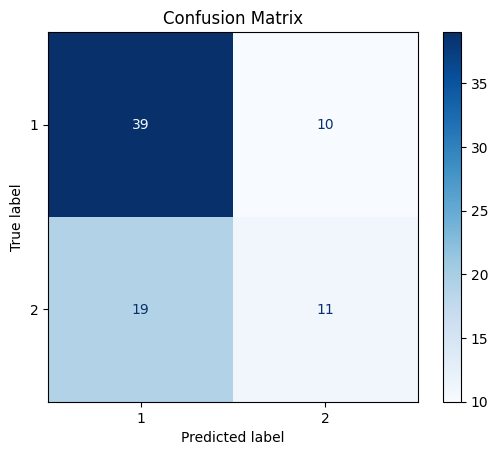

Accuracy of SVM Model on Test Set: 0.63


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

# Create a confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred_final)
print(f'Accuracy of SVM Model on Test Set: {test_accuracy:.2f}')


Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

In [11]:
# Define a function to add outliers
def add_outliers(df, n_outliers=10):
    outliers = pd.DataFrame({
        'Age': np.random.randint(100, 150, size=n_outliers),  # Age values beyond normal range
        'Gender': np.random.choice(['Male', 'Female'], size=n_outliers),  # Random genders
        'Total_Bilirubin': np.random.uniform(10, 20, size=n_outliers),  # High bilirubin values
        'Direct_Bilirubin': np.random.uniform(5, 10, size=n_outliers),
        'Alkaline_Phosphotase': np.random.randint(500, 1000, size=n_outliers),
        'Alamine_Aminotransferase': np.random.randint(200, 300, size=n_outliers),
        'Aspartate_Aminotransferase': np.random.randint(200, 300, size=n_outliers),
        'Total_Protiens': np.random.uniform(10, 20, size=n_outliers),
        'Albumin': np.random.uniform(0, 1, size=n_outliers),
        'Albumin_and_Globulin_Ratio': np.random.uniform(0, 1, size=n_outliers),
        'label': np.random.choice([1, 2], size=n_outliers)  # Random labels
    })
    return pd.concat([df, outliers], ignore_index=True)

# Add outliers to the dataset
df_with_outliers = add_outliers(df)

# Check the shape of the new dataset
print(f'Shape of the dataset with outliers: {df_with_outliers.shape}')


Shape of the dataset with outliers: (593, 11)


In [12]:
# Drop any existing NaN values (if any)
df_with_outliers.dropna(inplace=True)

# Normalize numerical features
numerical_cols = df_with_outliers.select_dtypes(include=[np.number]).columns.tolist()
df_with_outliers[numerical_cols] = (df_with_outliers[numerical_cols] - df_with_outliers[numerical_cols].min()) / (df_with_outliers[numerical_cols].max() - df_with_outliers[numerical_cols].min())

# Convert Gender to numerical values
df_with_outliers['Gender'] = df_with_outliers['Gender'].map({'Male': 0, 'Female': 1})

# Split the data into features and target
X = df_with_outliers.drop('label', axis=1)
y = df_with_outliers['label']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy and classification report
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

print('SVM Model Performance:')
print(f'Accuracy: {svm_accuracy:.2f}')
print('Classification Report:')
print(svm_report)


SVM Model Performance:
Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.99      0.83        84
         1.0       0.00      0.00      0.00        34

    accuracy                           0.70       118
   macro avg       0.35      0.49      0.41       118
weighted avg       0.50      0.70      0.59       118



In [14]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)

# Calculate accuracy and classification report
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg)

print('Logistic Regression Model Performance:')
print(f'Accuracy: {log_reg_accuracy:.2f}')
print('Classification Report:')
print(log_reg_report)


Logistic Regression Model Performance:
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83        84
         1.0       0.00      0.00      0.00        34

    accuracy                           0.71       118
   macro avg       0.36      0.50      0.42       118
weighted avg       0.51      0.71      0.59       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
